In [1]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
import funcoes as fun

In [2]:
dir_dados = "dados_com_evap_manso.csv"
# "MANSO": Dados Naturais
# "COIMBRA_F": Dados Observados
# "COIMBRA_P": Dados de chuva
dados_nat = fun.dados(dir_dados, label="MANSO")

# Cap.: 3 - Função de Massa de Probabilidade

A **Função de Massa de Probabilidade (PMF)** é uma maneira de representar uma distribuição e mapeia as probabilidade relativa de cada valor;

- Probabilidade é a divisão da frequência pelo tamanho da amostra;

Como a pmf é normalizada, a probilidade total é 1;

In [3]:
#Mês ínicio do ano hidrológico
inicio = fun.month_start_year_hydrologic(dados_nat)

#Dados de máximas anuais
dados_nat_max = fun.annual(dados_nat, inicio)

In [4]:
#plotar hidrograma de máximas anuais

In [5]:
#PMF
pmf_nat = thinkstats2.Pmf(dados_nat_max)
print('Probabilidade Total: ', pmf_nat.Total())

Probabilidade Total:  1.0000000000000002


Pmf e Hist são objetos similires em muitos aspectos;

A diferneça é:

- **Hist** contabiliza valores inteiros;

- **PMF** contabiliza probabilidades de ponto flutuantes;

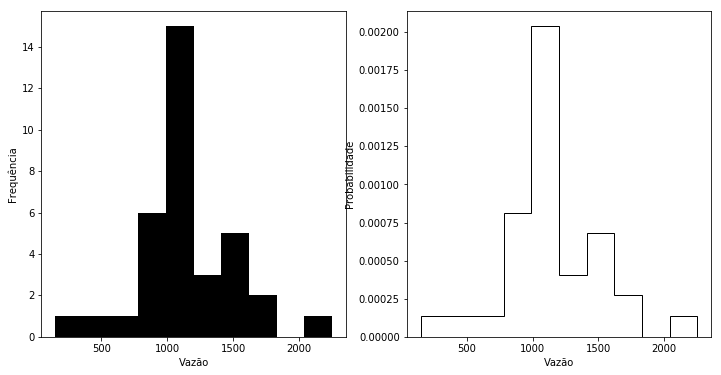

In [6]:
thinkplot.PrePlot(1, cols=2)
counts, bins = np.histogram(dados_nat_max)
hist = plt.hist(bins[:-1], bins, weights=counts, color='black')
thinkplot.Config(xlabel='Vazão', ylabel='Frequência')

thinkplot.SubPlot(2)
counts, bins = np.histogram(dados_nat_max, density=True)
_ = plt.hist(bins[:-1], bins, weights=counts, color='black', histtype='step')
thinkplot.Config(xlabel='Vazão', ylabel='Probabilidade')

In [7]:
q95 = dados_nat.quantile(0.95)
print('Probabiidade: ', pmf_nat.ProbGreater(q95))

Probabiidade:  0.9428571428571431


## As limitações das PMFs

- As Pmfs funcionam bem para tamanhos pequenos;

- Com o aumento do tamanho, a probabilidade diminui e aumenta os ruídos;

- Quando se tem uma amostra grande, é difícil de se fazer comparações usando uma Pmf;

- Podemos usar categorias para minizar esse problema, mas difícil de obter o tamanho de cada categoria;

- Uma outra solução é utilizar Função de Distribuição Acumulada (no inglês CDF).

# Cap.: 4 - Função de Distribuição Acumulada

## Percentis

- O percentil é o valor de uma evento ser menor ou igual;

- Percentil Rank: Calcula a classificação percentual do valor(recebido) em um conjunto de valores;

- Percentil: Calcula o valor correspondente ao percentil(recebido);

## CDFs

- A CDF mapeia os valores para um rank percentil;

- Para avaliar valor particular de uma vazão x, calculamos a fração de valores na distribuição menor ou igual a vazão x;

- Na CDF podemos avaliar qualquer valor, não apenas valores que aparecem na amostra;

In [8]:
# "COIMBRA_F": Dados Observados
dados_obs = fun.dados(dir_dados, label="COIMBRA_F")

#Considerando o período sem falha dos dados observados entre "01/01/1982" e "31/12/1986";
# e atualizando os dados naturais e observados para o período sem falhas
dados_obs = fun.date(dados_obs, start="01/01/1982", end="31/12/1986")
dados_nat = fun.date(dados_nat, start="01/01/1982", end="31/12/1986")


#Mês ínicio do ano hidrológico
inicio_nat = fun.month_start_year_hydrologic(dados_nat)
inicio_obs = fun.month_start_year_hydrologic(dados_obs)

#Dados de máximas anuais
dados_obs_max = fun.annual(dados_obs, inicio_obs)
dados_nat_max = fun.annual(dados_nat, inicio_nat)

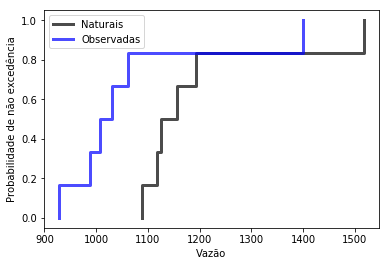

<Figure size 576x432 with 0 Axes>

In [9]:
cdf_nat_max = thinkstats2.Cdf(dados_nat_max, label='Naturais')
cdf_obs_max = thinkstats2.Cdf(dados_obs_max, label='Observadas')
thinkplot.Cdf(cdf_nat_max, color='black')
thinkplot.Cdf(cdf_obs_max, color='blue')
thinkplot.Show(xlabel='Vazão', ylabel='Probabilidade de não excedência')

A CDF apresenta algumas vantagens:

- A CDF também fornece uma representação visual da forma da distribuição;

- Os valores mais comuns aparecem na parte mais íngreme da CDF;

- As informações de uma CDF são apresentadas com mais clareza do que uma PMF;

- As CDFs são especialmente úteis para comparações, as diferenças entre distribuições são mais claras na Cdf;

Os percentil são usados para computar algumas estatísticas:

- Percentil 50°, corresponde ao valor central da distribuição, conhecido como **mediana**;

- Outra estatítica é o **intervalo interquantil**, que é a diferença entre o percentil 75° e 25°;

Usados para resumir a forma de uma distribuição.

In [10]:
p_nat_1 = cdf_nat_max.PercentileRank(1000)
p_nat_2 = cdf_nat_max.PercentileRank(2000)

p_obs_1 = cdf_obs_max.PercentileRank(1000)
p_obs_2 = cdf_obs_max.PercentileRank(2000)

print('Rank Percentil(NAT) de 1000: ', p_nat_1)
print('Rank Percentil(OBS) de 1000: ', p_obs_1)
print('Rank Percentil(NAT) de 2000: ', p_nat_2)
print('Rank Percentil(OBS) de 2000: ', p_obs_2)

Rank Percentil(NAT) de 1000:  0
Rank Percentil(OBS) de 1000:  33.33333333333333
Rank Percentil(NAT) de 2000:  100.0
Rank Percentil(OBS) de 2000:  100.0


**Quartis** das máximas anuais naturais 

In [11]:
q_nat_1 = cdf_nat_max.Percentile(25)
q_nat_2 = cdf_nat_max.Percentile(50)
q_nat_3 = cdf_nat_max.Percentile(75)

print('Valor referente ao percentil 25: ', q_nat_1)
print('Valor referente ao percentil 50: ', q_nat_2)
print('Valor referente ao percentil 75: ', q_nat_3)

Valor referente ao percentil 25:  1118.0
Valor referente ao percentil 50:  1126.0
Valor referente ao percentil 75:  1193.0


**Quartis** das máximas anuais observadas

In [12]:
q_obs_1 = cdf_obs_max.Percentile(25)
q_obs_2 = cdf_obs_max.Percentile(50)
q_obs_3 = cdf_obs_max.Percentile(75)

print('Valor referente ao percentil 25: ', q_obs_1)
print('Valor referente ao percentil 50: ', q_obs_2)
print('Valor referente ao percentil 75: ', q_obs_3)

Valor referente ao percentil 25:  987.529
Valor referente ao percentil 50:  1006.577
Valor referente ao percentil 75:  1061.887


Observando os quartis, podemos notar que as vazões dos dados naturais são maiores do que as dos dados observados;

# Cap.: 7 - Relacionamento entre variáveis

## Gráficos de dispersão

- Opção mais simples para verificar relação entre duas variáveis;

- Consiste no lançamento dos pares de observações das variáveis que se deseja verificar a relação;

- Fornece uma impressão geral sobre o relacionamento entre variáveis;

Podemos verificar a relação entre os dados de média mensal das vazoẽs observadas e  chuva acumulada mensal;

In [13]:
dados_obs_mensal = fun.dados_media(dados_obs, freq='M')

# "COIMBRA_P": Dados de chuva
dados_chuva = fun.dados(dir_dados, label="COIMBRA_P")
dados_chuva = fun.date(dados_chuva, start="01/01/1982", end="31/12/1986")

dados_chuva_acumulada = fun.dados_acumulado(dados_chuva, freq='M')

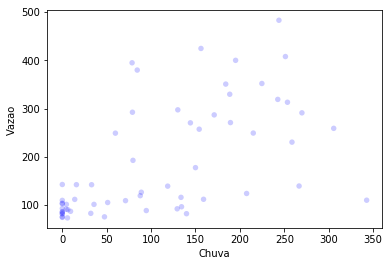

<Figure size 576x432 with 0 Axes>

In [14]:
thinkplot.Scatter(dados_chuva_acumulada, dados_obs_mensal)
thinkplot.Show(xlabel='Chuva', ylabel='Vazao', legend=False)

* Podemos observar que existe alguma relação entre as variáveis, mas podemos notar algumas aleatoriedade entre as variáveis de chuva e vazão.
* A variável de vazão não depende somente da variável de chuva;

## Caracterizando relacionamentos
* Outras formas de visualização fornece um maior conhecimento da natureza do relacionamento; 
 * Uma opção é o gráfico de percentis;

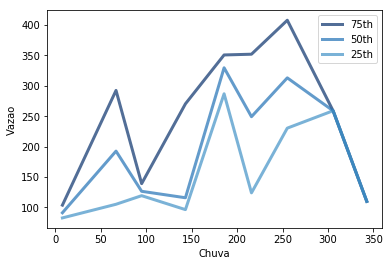

In [15]:
fun.plot_percentil(dados_chuva_acumulada, dados_obs_mensal)
thinkplot.Config(xlabel='Chuva', ylabel='Vazao', legend=True)

O gráfico de percentis, mostra que os dados de chuva e vazão observada não tem uma boa relação linear;

## Correlações

* Utilizada para **quantificar a força** de relacionamento entre duas variáveis;
* Um dos problemas para medir a relação entre duas variáveis é que muitas vezes elas não apresentam as mesmas **unidades** ou são de **distribuições diferentes**;
* As soluções para esses problemas são:
 * Transformar cada valor em um **score padrão**: que é o número desvio padrão a partir da média, "Coeficiente de correlação produto-momento de Pearson";
 * Transformar cada valor em **rank**: que é uma lista organizado pelo index de cada valor, “Coeficiente de correlação Spearman rank".
* Se X é uma série de n valores, então o score padrão(Z) é:
\begin{align}
z_i & = \frac{x_i-\mu}{\sigma} \\
\end{align}
Onde:
 * $z_i$ é score padrão;
 * $x_i$ valor da variável;
 * $\mu$ é a média;
 * $\sigma$ é o desvio padrão.
* O Score padrão (Z) é admensional;

In [17]:
df_zscore = (dados_obs_mensal - dados_obs_mensal.mean())/dados_obs_mensal.std()
df_zscore.head(5)

1982-01-31    1.863917
1982-02-28    2.078658
1982-03-31    1.819469
1982-04-30    0.925669
1982-05-31   -0.380720
Freq: M, Name: COIMBRA_F, dtype: float64

## Covariância
* É uma medida da tendência de duas variáveis variarem juntas. 
* Se temos duas séries, X e Y, seus desvios a partir da média são:
\begin{align}
dx_i & = x_i - \overline{x}\\
dy_i & = y_i - \overline{y}\\
\end{align}
Onde,
 * $\overline{x}$ é a média da amostra X;
 * $\overline{y}$ é a média da amostra Y;
* X e Y variando juntos, os sinais dos desvios tendem a ter o mesmo sinal;
* O produto é positivo quando os desvios tiverem o mesmo sinal e negativos quando tiverem o sinal oposto.
* Covariância é a média dos produtos dos desvios;
\begin{align}
Cov(X,Y) = \frac{1}{n} \sum dx_i dy_i
\end{align}
Onde:
 * $n$ é o tamanho das séries;

In [20]:
print("Covariância: ", dados_chuva_acumulada.cov(dados_obs_mensal))

Covariância:  6631.9222952591745


## Correlação de Pearson
* Corvariância é muito utilizada, mas é difícil de interpretar;
* Um dos problemas é a difecença de unidades;
* Para resolver esse problema, divide os desvios pelos desvio padrão;
\begin{align}
P_i = \frac{(x_i - \overline{x})}{S_X}  \frac{(y_i - \overline{y})}{S_Y}
\end{align}

Onde $S_X$ e $S_Y$ são os desvios padrão de $X$ e $Y$. A média destes produtos é
\begin{align}
\rho = \frac{1}{n} \sum \rho_i
\end{align}
Reescrever $\rho$ calculando $S_X$ e $S_Y$
Onde $S_X$ e $S_Y$ são os desvios padrão de $X$ e $Y$. A média destes produtos é
\begin{align}
\rho = \frac{Cov(X, Y)}{S_X S_Y}
\end{align}

In [21]:
print("Correlação Pearson: ", dados_chuva_acumulada.corr(dados_obs_mensal))

Correlação Pearson:  0.596723094522927


* É fácil de calcular e de interpretar;
* Como o score padrão é admensional, o mesmo acontece com a correlação de Pearson;
* A correlação de Pearson é sempre entre -1 e +1;
* $\rho$ é positivo a relação é **maior - maior** ou **menor - menor**;
* $\rho$ é negativa a relação é **maior - menor** ou **menor - maior**;
* $\rho$ sendo 0, nenhuma relação;
* O valor de $\rho$ indica a força de correlação, $\rho$ sendo 1 ou -1, o relacionamento entre as variáveis são perfeitas;

## Relações não lineares
* O coeficiente de correlação de Pearson mede apenas os relacionamentos lineares;
* Antes de calcular o coeficente de correlação devemos primeiro olhar o gráfico de dispersão;

## Correlação Spearman’s rank
* A correlação de Pearson não é robusto na presença de outliers;
* A correlaçção de Spearman's é uma alternativa para diminuir os efeitos de  outliers e distribuições distorcidas;
* A correlação de Spearman, é o índice na amostra classificada;

In [1]:
print("Correlação Spearman: ", dados_chuva_acumulada.corr(dados_obs_mensal, method='spearman'))

#Log
print("Correlação Pearson: ", dados_chuva_acumulada.corr(np.log(dados_obs_mensal)))

NameError: name 'dados_chuva_acumulada' is not defined

Causas para a correlação de Spearman ser maior que a de Pearson:
* Para relacionamento não linear, a correlação de Pearson tende a subestimar a força da relaçao;
* A correlação de Pearson é afetada por outliers;

## Correlação e causalidade
* Existe 3 posibilidades para 2 variáveis (A e B) serem correlaciondas:
 * A causa B;
 * B causa A;
 * Outro fator causa A e B;
* Como identificar a casualidade:
 * **Tempo**, a variável que acontece primeiro causa a outra;
 * **Aleatoriedade**
 * Em alguns casos, é possível inferir relações causais usando **análise de regressão**;